Linear SVM Accuracy: 0.9707602339181286
RBF SVM Accuracy: 0.9532163742690059

Classification Report (RBF):
               precision    recall  f1-score   support

           0       0.92      0.95      0.94        63
           1       0.97      0.95      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



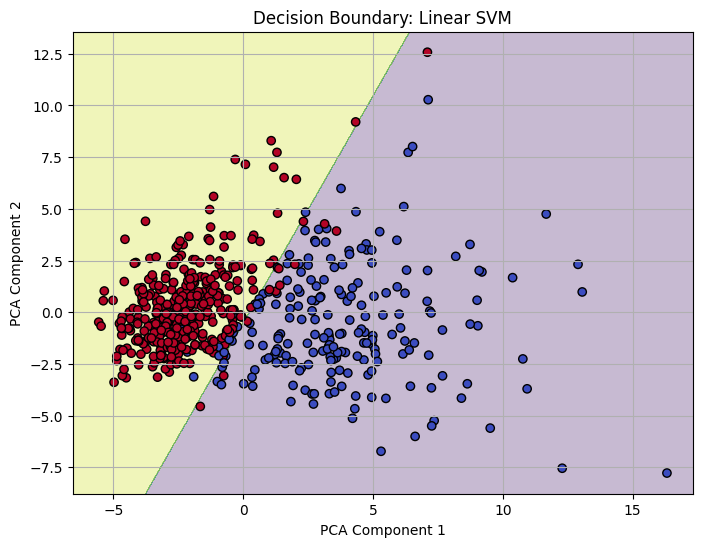

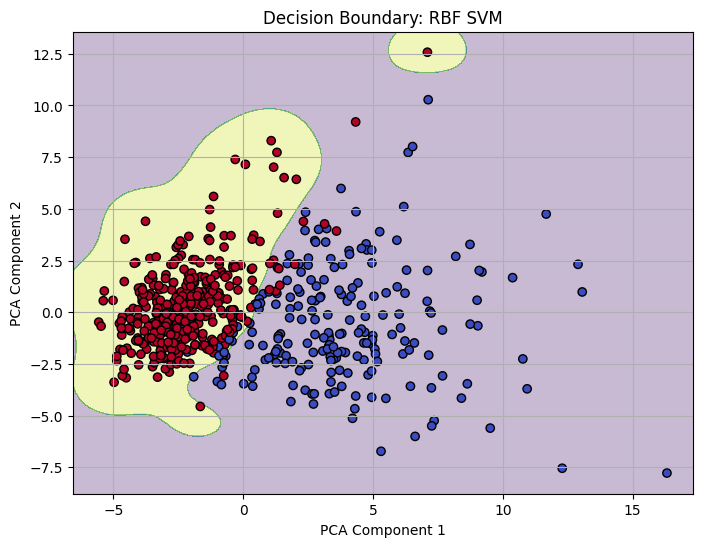

Best Parameters from GridSearchCV: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy with best parameters: 0.935672514619883


In [ ]:
# Task 7: SVM for Binary Classification using Breast Cancer Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

# 1. Load and preprocess the data
data = load_breast_cancer()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Reduce dimensions to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# 4. Train SVM models with linear and RBF kernels
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train, y_train)

# 5. Predict and evaluate both models
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_linear))
print("RBF SVM Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("\nClassification Report (RBF):\n", classification_report(y_test, y_pred_rbf))

# 6. Plotting function for decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# 7. Plot decision boundaries for both models
plot_decision_boundary(svm_linear, X_pca, y, "Decision Boundary: Linear SVM")
plot_decision_boundary(svm_rbf, X_pca, y, "Decision Boundary: RBF SVM")

# 8. Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 0.5, 1],
    'kernel': ['rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, refit=True)
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# 9. Evaluate the best model from grid search
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Accuracy with best parameters:", accuracy_score(y_test, y_pred_best))
